In [2]:
source('helpers.R')
kaggle.house.loadLibraries()

df.combined = kaggle.house.PrepareCombinedDataSet()
df.lot_frontage = df.combined %>% filter(!is.na(LotFrontage))
df.lot_frontage %>% count()

n
2433


In [4]:
groupDataFrame = function (df) {
    df %>%
    mutate(
        Split.Condition = case_when(
            Neighborhood == 'Somerst' ~ 
                
                case_when(
                    LotShape2 == 'Reg' ~ '1.1 Somerst Neighb. Reg Shape',
                    TRUE ~ '1.2 Somerst Neighb. non-Reg Shape'
                ),
            
            TRUE ~
                
                case_when(
                    LotShape2 == 'Reg' ~
                        
                        case_when(
                            HouseStyle.2Story == 'N' ~
                                case_when(
                                    GarageType2 == 'Detchd'  ~ '2.1.1.1 Reg Shape non-2Story Garage Detchd',
                                    GarageType2 == 'Attchd'  ~ '2.1.1.2 Reg Shape non-2Story Garage Attchd',
                                    TRUE ~ '2.1.1.3 Reg Shape non-2Story Garage Another'
                                ),
                            TRUE ~ '2.1.2 Reg Shape 2Story'
                        ),
                    
                    TRUE ~
                        case_when(
                            LotConfig2 == 'Corner' ~ '2.2.1 non-Reg Shape Corner Config',
                            LotConfig2 == 'Inside' ~ '2.2.2 non-Reg Shape Inside Config',
                            TRUE ~ '2.2.3 non-Reg Shape Another Config'
                        )
                    
                )
        )
    ) %>%
    group_by(Split.Condition)
}

In [41]:
df = groupDataFrame(df.lot_frontage)

df %>% 
do(mod = lm(LotFrontage.Log ~ LotArea.Log, data=.)) -> model

model %>% print

df %>% 
do(augment(lm(LotFrontage.Log ~ LotArea.Log, data=.), data = .)) -> fitted

fitted %>% summarise(n=n())
fitted %>% summarise(n=n()) %>% summarise(sum(n))

model %>% glance(mod) %>% head
model %>% tidy(mod) %>% head

Source: local data frame [9 x 2]
Groups: <by row>

# A tibble: 9 x 2
                              Split.Condition      mod
*                                       <chr>   <list>
1               1.1 Somerst Neighb. Reg Shape <S3: lm>
2           1.2 Somerst Neighb. non-Reg Shape <S3: lm>
3  2.1.1.1 Reg Shape non-2Story Garage Detchd <S3: lm>
4  2.1.1.2 Reg Shape non-2Story Garage Attchd <S3: lm>
5 2.1.1.3 Reg Shape non-2Story Garage Another <S3: lm>
6                      2.1.2 Reg Shape 2Story <S3: lm>
7           2.2.1 non-Reg Shape Corner Config <S3: lm>
8           2.2.2 non-Reg Shape Inside Config <S3: lm>
9          2.2.3 non-Reg Shape Another Config <S3: lm>


Split.Condition,n
1.1 Somerst Neighb. Reg Shape,113
1.2 Somerst Neighb. non-Reg Shape,49
2.1.1.1 Reg Shape non-2Story Garage Detchd,452
2.1.1.2 Reg Shape non-2Story Garage Attchd,605
2.1.1.3 Reg Shape non-2Story Garage Another,154
2.1.2 Reg Shape 2Story,403
2.2.1 non-Reg Shape Corner Config,123
2.2.2 non-Reg Shape Inside Config,433
2.2.3 non-Reg Shape Another Config,101


sum(n)
2433


Split.Condition,r.squared,adj.r.squared,sigma,statistic,p.value,df,logLik,AIC,BIC,deviance,df.residual
1.1 Somerst Neighb. Reg Shape,0.9809293,0.9807575,0.06516072,5709.44146,2.771905e-97,2,149.26043,-292.52086,-284.33870,0.471297,111
1.2 Somerst Neighb. non-Reg Shape,0.4339346,0.4218907,0.30995755,36.02928,2.668880e-07,2,-11.11233,28.22466,33.90012,4.515463,47
2.1.1.1 Reg Shape non-2Story Garage Detchd,0.2766771,0.2750697,0.14934222,172.12881,1.589916e-33,2,219.12671,-432.25342,-419.91237,10.036394,450
2.1.1.2 Reg Shape non-2Story Garage Attchd,0.7336161,0.7331744,0.14745037,1660.65074,2.340109e-175,2,300.67335,-595.34669,-582.13101,13.110192,603
2.1.1.3 Reg Shape non-2Story Garage Another,0.6177439,0.6152290,0.22392848,245.63916,1.486310e-33,2,12.94002,-19.88004,-10.76918,7.621882,152
2.1.2 Reg Shape 2Story,0.8686114,0.8682838,0.17843507,2651.01619,7.967247e-179,2,123.75306,-241.50612,-229.50931,12.767468,401


Split.Condition,term,estimate,std.error,statistic,p.value
1.1 Somerst Neighb. Reg Shape,(Intercept),-3.2500195,0.09679394,-33.5766836,5.755464e-60
1.1 Somerst Neighb. Reg Shape,LotArea.Log,0.8295389,0.01097842,75.5608461,2.771905e-97
1.2 Somerst Neighb. non-Reg Shape,(Intercept),-0.7273705,0.81326468,-0.8943835,3.756741e-01
1.2 Somerst Neighb. non-Reg Shape,LotArea.Log,0.5424687,0.09037471,6.0024397,2.668880e-07
2.1.1.1 Reg Shape non-2Story Garage Detchd,(Intercept),1.1403487,0.22618328,5.0417019,6.700296e-07
2.1.1.1 Reg Shape non-2Story Garage Detchd,LotArea.Log,0.3300755,0.02515860,13.1197870,1.589916e-33


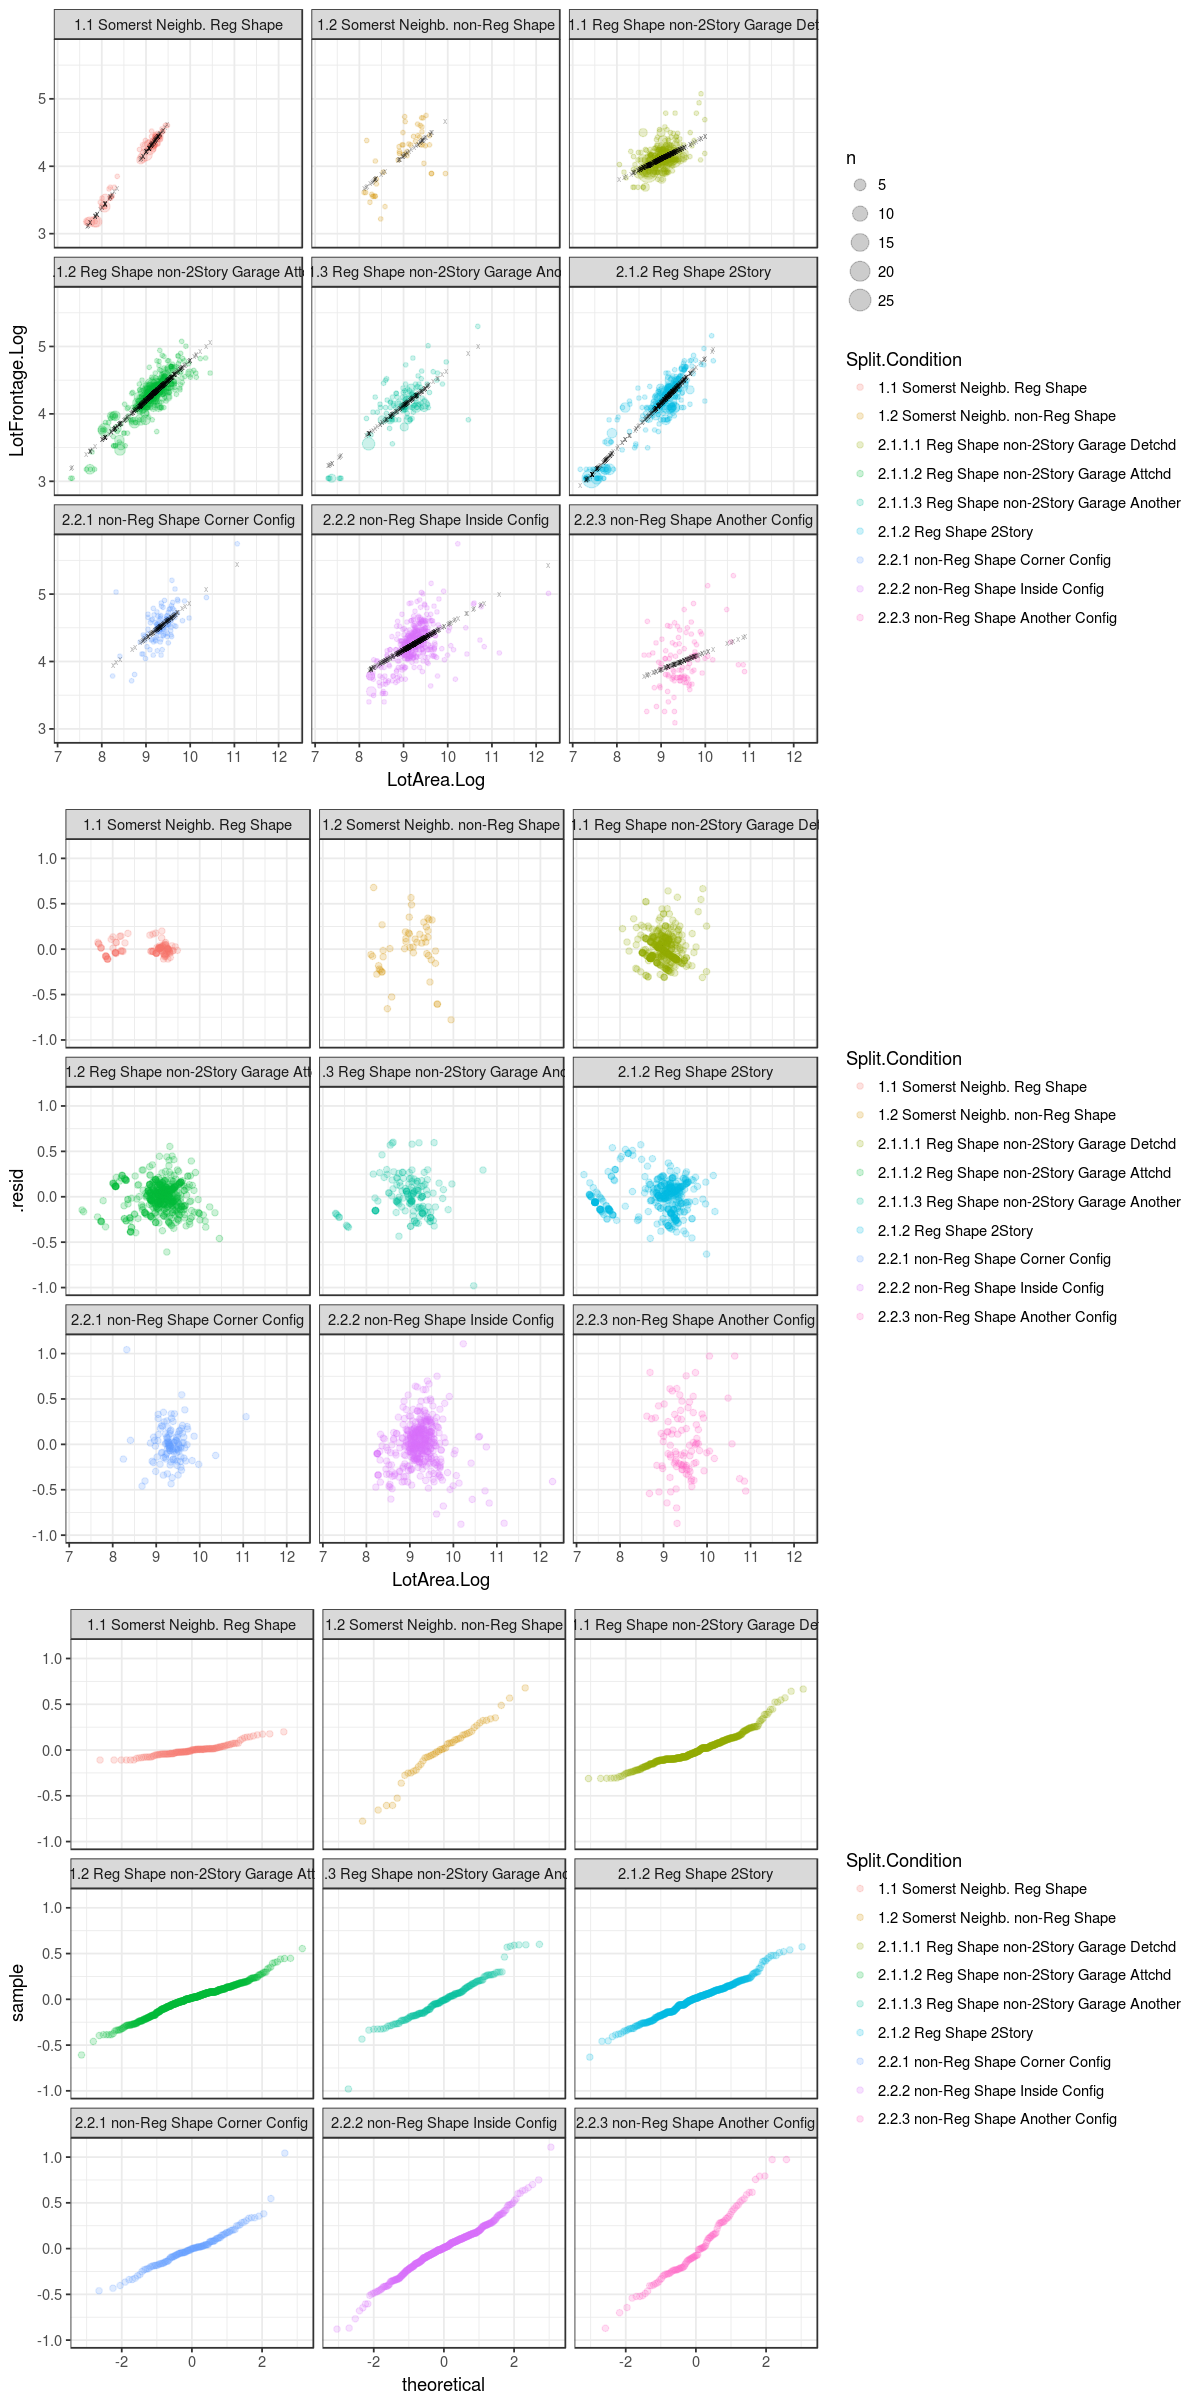

In [42]:
options(repr.plot.width = 10, repr.plot.height = 20)

ggplot() +
geom_count(data=fitted, aes(x=LotArea.Log, y=LotFrontage.Log, colour = Split.Condition), alpha=0.2) +
geom_point(data=fitted, aes(x=LotArea.Log, y=.fitted), alpha=0.3, color="black", shape='x') +
facet_wrap(~Split.Condition) +
theme_bw() -> g1

ggplot() +
geom_point(data=fitted, aes(x=LotArea.Log, y=.resid, colour=Split.Condition), alpha=0.2) +
facet_wrap(~Split.Condition) +
theme_bw() -> g2

ggplot(fitted, aes(sample=.resid, colour=Split.Condition)) +
stat_qq(distribution=qnorm, alpha=0.2) +
facet_wrap(~Split.Condition) +
theme_bw() -> g3

grid.arrange(g1, g2, g3,    
    layout_matrix=rbind(
        c(1), c(2), c(3)
    )
)

df %>%
nest() %>%
mutate(mod = map(data, ~lm(LotFrontage.Log ~ LotArea.Log, .))) %>% 
select(-data) %>%
arrange(Split.Condition) -> model

model %>% print

model %>% 
mutate(LotFrontage.Log.Pred = map(mod, predict)) %>%
select(-mod) %>% unnest() %>% 
group_by(Split.Condition) -> fitted

fitted %>% summarise(n=n())
fitted %>% summarise(n=n()) %>% summarise(total=sum(n))

model %>% glance(mod)
model %>% tidy(mod)

In [49]:
df.lot_frontage.is.na = df.combined %>% filter(is.na(LotFrontage))
df.lot_frontage.is.na %>% count()

df = groupDataFrame(df.lot_frontage.is.na) %>% select(Split.Condition, LotArea.Log)

df %>% summarise(n=n())
df %>% summarise(n=n()) %>% summarise(sum(n))

df = df %>% 
nest(-Split.Condition) %>% 
inner_join(model, by='Split.Condition') %>%
mutate(LotFrontage.Log.Pred = map2(mod, data, predict)) %>% 
select(-mod) %>% 
unnest()

df %>% print

n
486


Split.Condition,n
1.1 Somerst Neighb. Reg Shape,11
1.2 Somerst Neighb. non-Reg Shape,9
2.1.1.1 Reg Shape non-2Story Garage Detchd,21
2.1.1.2 Reg Shape non-2Story Garage Attchd,54
2.1.1.3 Reg Shape non-2Story Garage Another,14
2.1.2 Reg Shape 2Story,32
2.2.1 non-Reg Shape Corner Config,86
2.2.2 non-Reg Shape Inside Config,158
2.2.3 non-Reg Shape Another Config,101


sum(n)
486


# A tibble: 486 x 3
                     Split.Condition LotFrontage.Log.Pred LotArea.Log
                               <chr>                <dbl>       <dbl>
 1 2.2.1 non-Reg Shape Corner Config             4.477649    9.247829
 2 2.2.1 non-Reg Shape Corner Config             4.504431    9.298351
 3 2.2.1 non-Reg Shape Corner Config             4.631155    9.537411
 4 2.2.1 non-Reg Shape Corner Config             4.445171    9.186560
 5 2.2.1 non-Reg Shape Corner Config             4.564228    9.411157
 6 2.2.1 non-Reg Shape Corner Config             4.476269    9.245225
 7 2.2.1 non-Reg Shape Corner Config             4.728636    9.721306
 8 2.2.1 non-Reg Shape Corner Config             4.695537    9.658865
 9 2.2.1 non-Reg Shape Corner Config             4.333962    8.976768
10 2.2.1 non-Reg Shape Corner Config             4.347709    9.002701
# ... with 476 more rows


In [ ]:
options(repr.plot.width = 10, repr.plot.height = 20)

ggplot() +
geom_count(data=df, aes(x=LotArea.Log, y=LotFrontage.Log, colour = Split.Condition), alpha=0.2) +
geom_point(data=df, aes(x=LotArea.Log, y=.fitted), alpha=0.3, color="black", shape='x') +
facet_wrap(~Split.Condition) +
theme_bw() -> g1

ggplot() +
geom_point(data=fitted, aes(x=LotArea.Log, y=.resid, colour=Split.Condition), alpha=0.2) +
facet_wrap(~Split.Condition) +
theme_bw() -> g2

ggplot(fitted, aes(sample=.resid, colour=Split.Condition)) +
stat_qq(distribution=qnorm, alpha=0.2) +
facet_wrap(~Split.Condition) +
theme_bw() -> g3

grid.arrange(g1, g2, g3,    
    layout_matrix=rbind(
        c(1), c(2), c(3)
    )
)